
# Imports

In [12]:
# Required imports 
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm

#Plots 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Number of days ahead to forecast (Variable)
days_ahead = 300

# Import Data and Visualize 

Observed that some of the flow data sets...eg. Sites 5691715/681 have a lot of missing datasets. Working with 708 for pipeline as datasets are complete. Resampling neccessary to deal with missing datasets. 

In [13]:

# Import as Dataframe 

#Try for the each points
df = pd.read_csv('https://raw.github.ibm.com/mwa-kenya/groundwater-advisor/master/flowtimeSeriesAnalysis/data/volume/21082780.csv?token=AAFQJx-5iiw8_ssxgCoKbnqcR4yiVPtjks5dNxv1wA%3D%3D')
#df = pd.read_csv('https://raw.github.ibm.com/mwa-kenya/groundwater-advisor/master/flowtimeSeriesAnalysis/data/volume/5691681.csv?token=AAFQJ9mPet46oRX2iX8tpSdqn1Lr7VwPks5dNxwSwA%3D%3D')
#df = pd.read_csv('https://raw.github.ibm.com/mwa-kenya/groundwater-advisor/master/flowtimeSeriesAnalysis/data/volume/5691708.csv?token=AAFQJ9BduPqTsjVUxgWXmf4ZT1JIIFMNks5dNxwswA%3D%3D')
#df = pd.read_csv('https://raw.github.ibm.com/mwa-kenya/groundwater-advisor/master/flowtimeSeriesAnalysis/data/volume/5691715.csv?token=AAFQJycKW7eb1d567-oDqiKVREfpvCXiks5dNxxDwA%3D%3D')
#df = pd.read_csv('https://raw.github.ibm.com/mwa-kenya/groundwater-advisor/master/flowtimeSeriesAnalysis/data/volume/8037020.csv?token=AAFQJ1VzwooGHh191Vd2r669nFb_dsekks5dNxxVwA%3D%3D')

HTTPError: HTTP Error 404: Not Found

In [ ]:
#Check the dataframe
df.head()

In [11]:
#Name columns 
df.columns = ['date','volume']

NameError: name 'df' is not defined

In [273]:
df.date = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

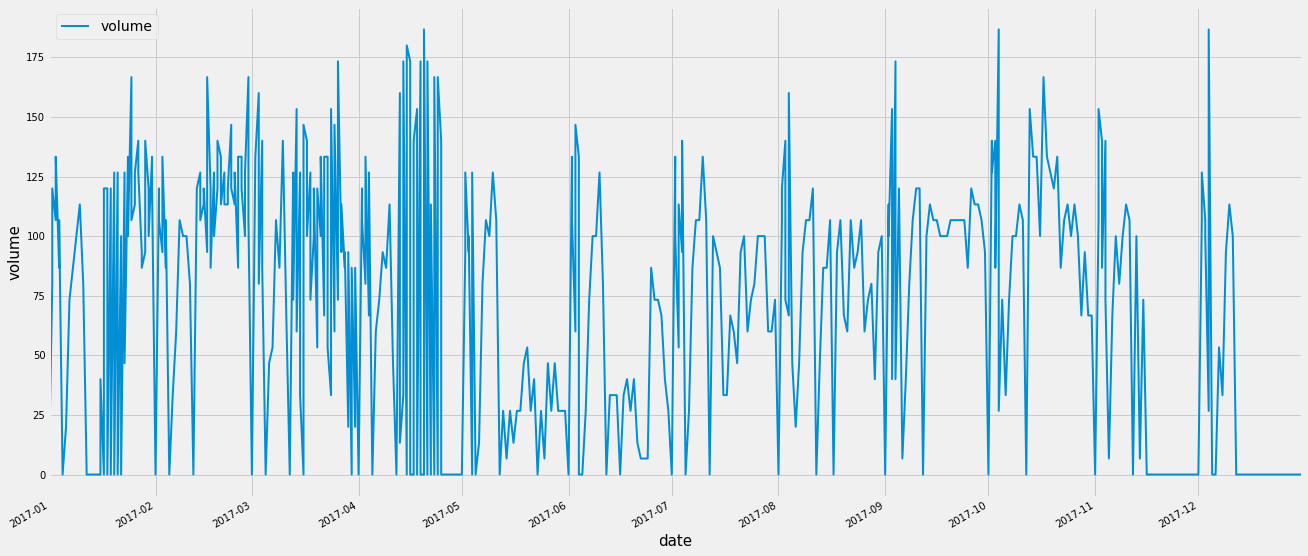

In [274]:
df.plot(figsize=(20,10), linewidth=2, fontsize=10)
plt.xlabel('date', fontsize=15);
plt.ylabel('volume', fontsize=15);

# Trends and seasonality in 

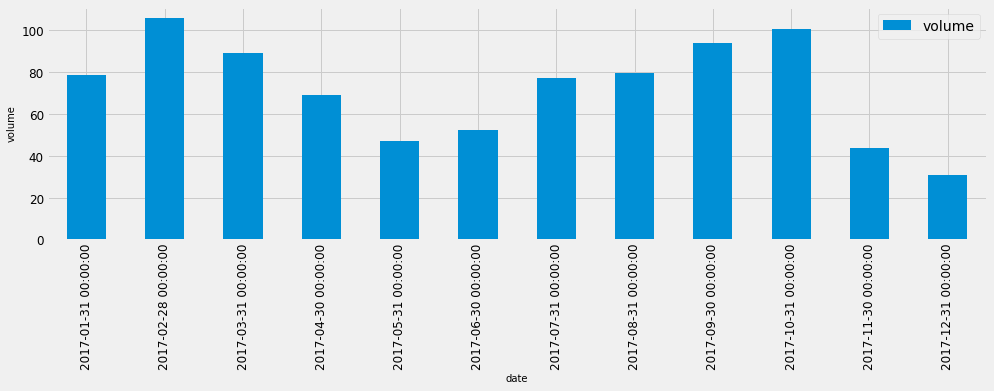

In [275]:

resample = df.resample('M')
monthly_mean = resample.mean()
monthly_mean.plot(kind="bar",figsize=(15,4))
plt.xlabel('date', fontsize=10);
plt.ylabel('volume', fontsize=10);
plt.show()

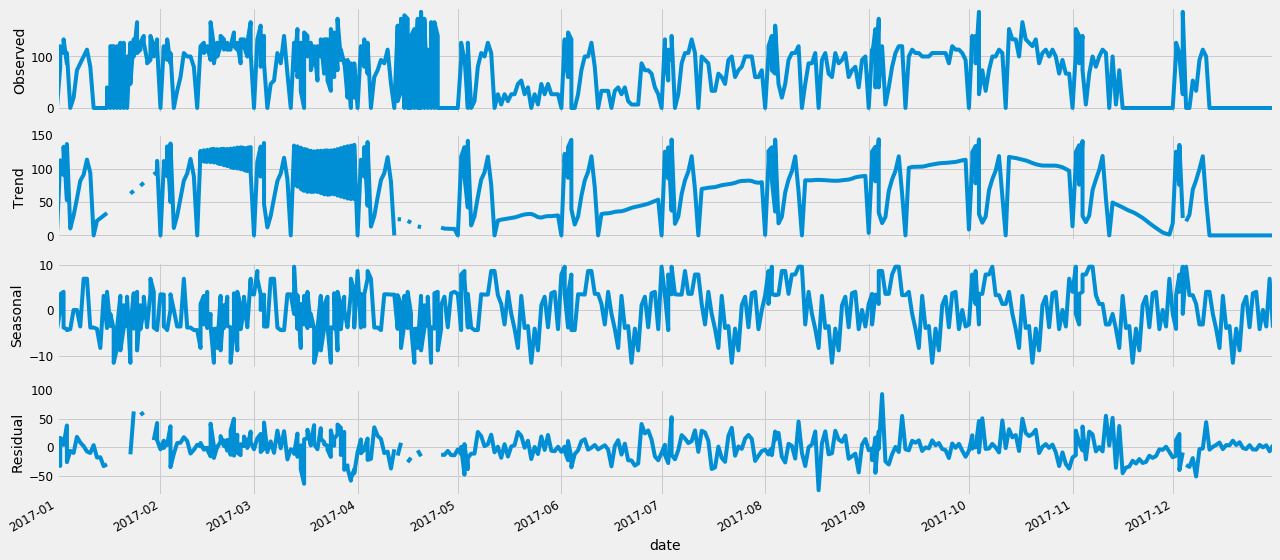

In [276]:
#Frequency of the decomposition must be an interval. 
decomposition = sm.tsa.seasonal_decompose(df, freq=30, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

# Prediction using seasonal auto-regressive integrated moving average

In [277]:
#p-regression term, d-seasonality, q- error term
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [278]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5517.261725281975
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5051.020062425449
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4661.410147473995
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4524.434600218541
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4657.066528658301
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4632.3807644405715
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4532.376213104618
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4524.415263496114
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5074.651857716089
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4746.071565167071
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4527.496235546073
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4363.878624747647
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4520.454784971484
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4468.139759160888
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4389.300663419549
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4365.840799265865
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4343.515207262274
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4239.463520813625
ARIMA(0, 

In [279]:
# Let's fit this model to the SARIMAX model but need to pass the values of the min AIC here automatically. 
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()


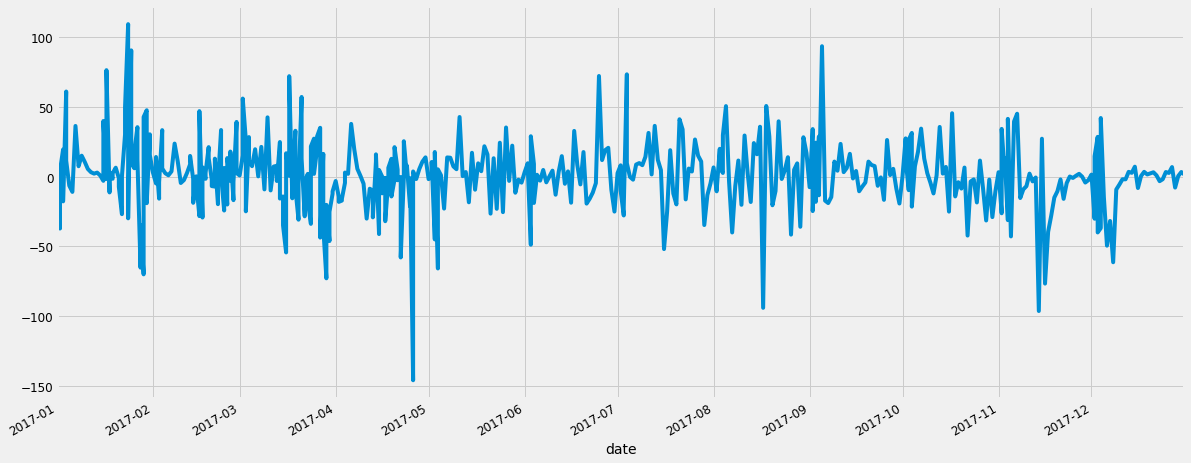

In [280]:
results.resid.plot()

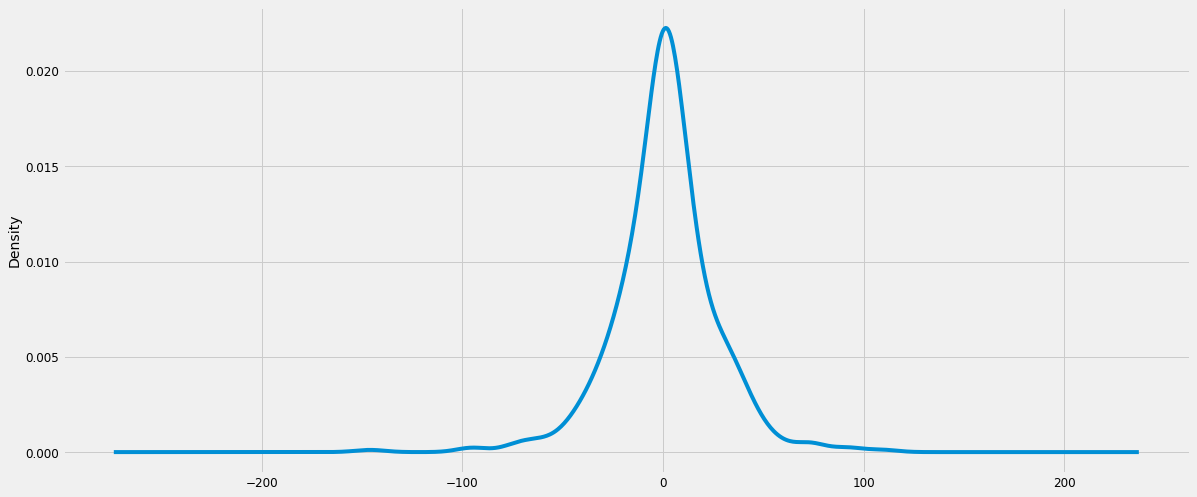

In [281]:
results.resid.plot(kind="kde")

KDE is close to N(0,1) line. N(0,1) is normal. Therefore residuals are normally distributed

In [283]:
#Validate the prediction. The pred.conf_int is the confidence interval for the prediction. Need a start date within the df set. 
pred = results.predict(start=pd.to_datetime('2017-03-31'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci


date
2017-01-16      0.000000
2017-01-17     43.517840
2017-01-18    131.233996
2017-01-19    121.457751
2017-01-20    120.189178
2017-01-21    127.622779
2017-01-22    126.819753
2017-01-23     96.436032
2017-01-24    129.816999
2017-01-25     96.824996
2017-01-26    107.186196
2017-01-27    114.247918
2017-01-28    158.509002
2017-01-29    163.305259
2017-01-30     72.269079
2017-01-31    104.383474
2017-01-02    117.128456
2017-02-02     92.519786
2017-03-02     77.199071
2017-04-02    134.298803
2017-05-02     92.986661
2017-06-02     99.766196
2017-07-02    110.074596
2017-08-02    117.137533
2017-09-02     79.082308
2017-10-02    112.461909
2017-11-02    132.892048
2017-12-02    111.955285
2017-02-13    105.062384
2017-02-14    125.386095
                 ...    
2017-03-28    129.796992
2017-03-29    113.464448
2017-03-30    111.788059
2017-03-31     97.241709
2017-01-04     95.097187
2017-02-04    100.735144
2017-03-04    111.549646
2017-04-04    123.681310
2017-05-04    121.38

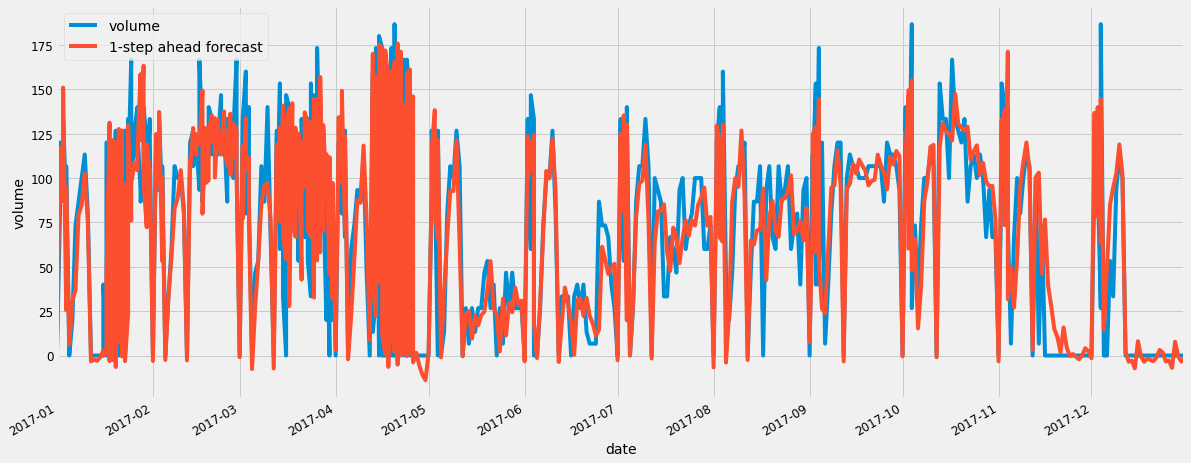

In [284]:
ax = df.plot(label='observed')
pred.plot(ax=ax, label='1-step ahead forecast')

ax.set_xlabel('date')
ax.set_ylabel('volume')
plt.legend()

plt.show()


# Forecast from the last date forward by x days

In [285]:
#Forecast method
forecast = results.forecast(steps= days_ahead)

print(forecast)


466     78.170425
467     93.582787
468     97.141952
469    100.202185
470    103.323963
471    100.678306
472    100.340729
473     98.174418
474    101.576532
475     98.542786
476     97.083823
477     90.543789
478    101.690465
479     99.419415
480     98.313025
481    100.142307
482    102.939314
483    100.207970
484     99.847785
485     97.675510
486    101.076049
487     98.041888
488     96.582816
489     90.042753
490    101.189422
491     98.918370
492     97.811979
493     99.641261
494    102.438268
495     99.706924
          ...    
736     89.325815
737     87.153539
738     90.554079
739     87.519918
740     86.060846
741     79.520783
742     90.667451
743     88.396400
744     87.290009
745     89.119291
746     91.916298
747     89.184953
748     88.824769
749     86.652493
750     90.053033
751     87.018872
752     85.559800
753     79.019736
754     90.166405
755     87.895353
756     86.788963
757     88.618244
758     91.415251
759     88.683907
760     88

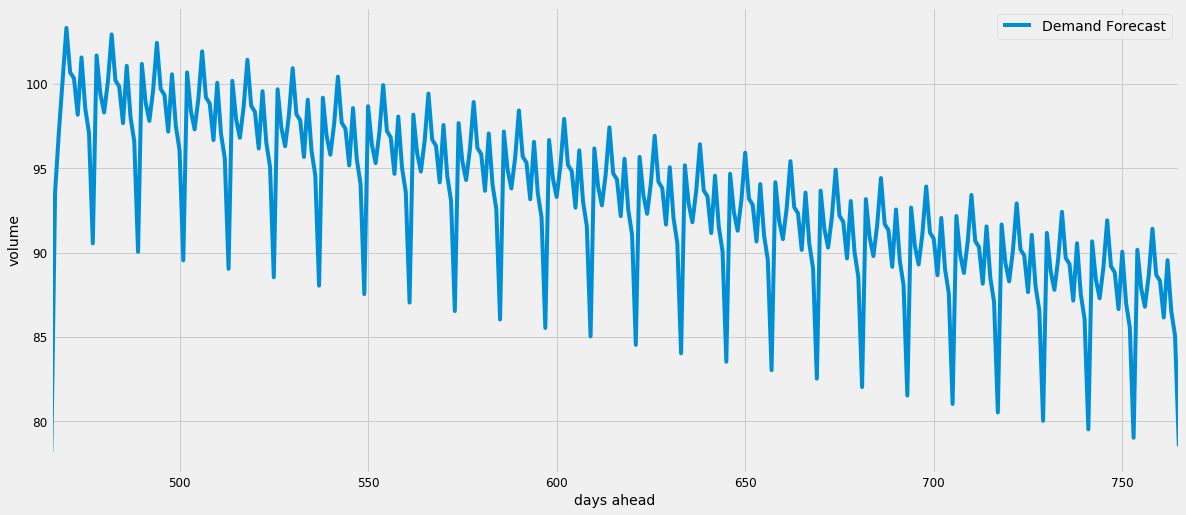

In [286]:
#ax = df.plot(label='observed', figsize=(20, 15))
ax= forecast.plot(label='Demand Forecast')

ax.set_xlabel('days ahead')
ax.set_ylabel('volume')
plt.legend()
plt.show()

In [247]:
#This result is wrong as the variability in flow is has other external factors affecting the flow. We have to remove this variability in the input signal to get the actual change in demand